In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import hipp

In [3]:
images_dir = "/home/godinlu/Documents/history-dataset/1978_09_06_aerial/raw_images/"

preproc = hipp.AerialPreprocessing(images_dir)

In [4]:
preproc.create_fiducial_template(corner=True, distance_around_fiducial=70)

In [5]:
preproc.create_fiducial_template(midside=True, distance_around_fiducial=70)

In [6]:
img_path = "/home/godinlu/Documents/history-dataset/1978_09_06_aerial/raw_images/ARBCSRD00010006.tif"
fiducials_detection, scores, subpixel_scores = hipp.aerial.detect_fiducials(img_path, **preproc.load_fiducials_template())

In [26]:
hipp.aerial.core.compute_principal_point_from_valid_segments(fiducials_detection)

(np.float64(5038.34375), np.float64(4715.75))

In [23]:
scores

{'corner_top_left': 0.9986482858657837,
 'corner_top_right': 0.9373782277107239,
 'corner_bottom_left': 0.9097214937210083,
 'corner_bottom_right': 0.9637625217437744,
 'midside_top': 0.9965028166770935,
 'midside_bottom': 0.9834309220314026,
 'midside_left': 0.9792076349258423,
 'midside_right': 0.928481936454773}

Fiducials detection: 100%|██████████| 37/37 [00:08<00:00,  4.35it/s]


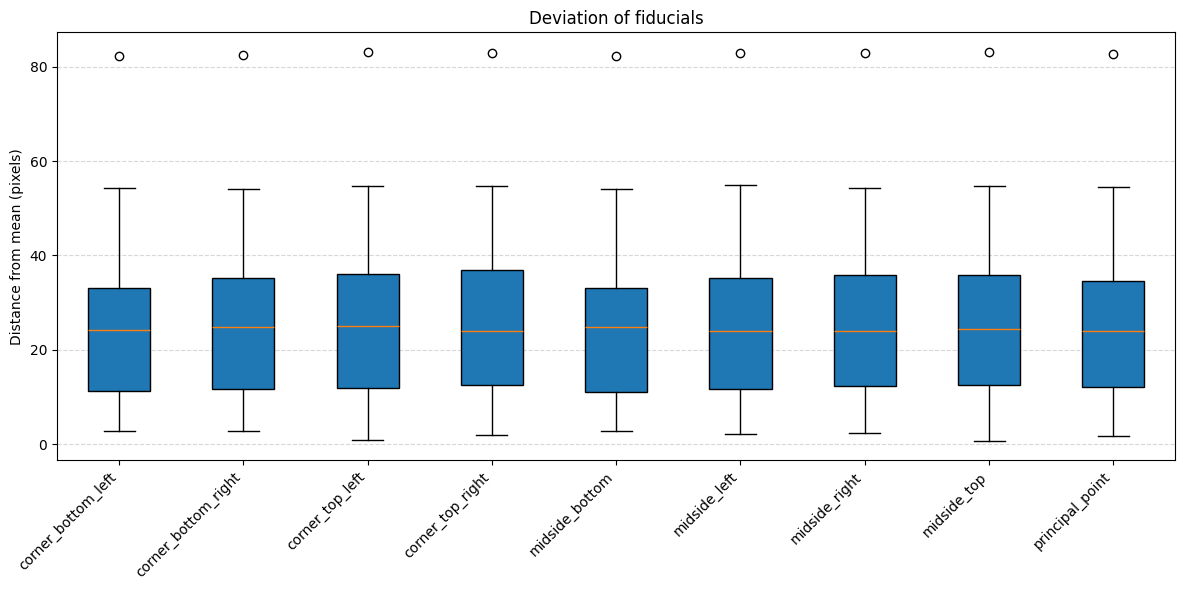

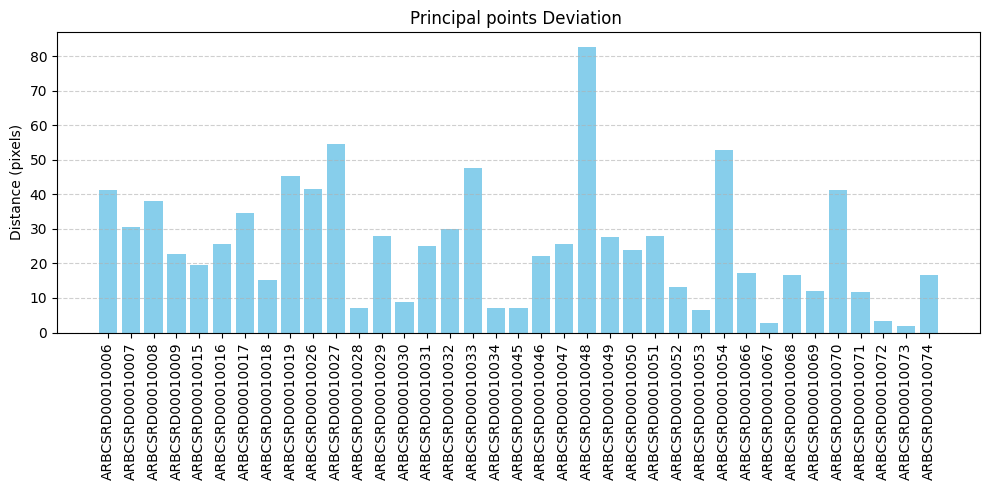

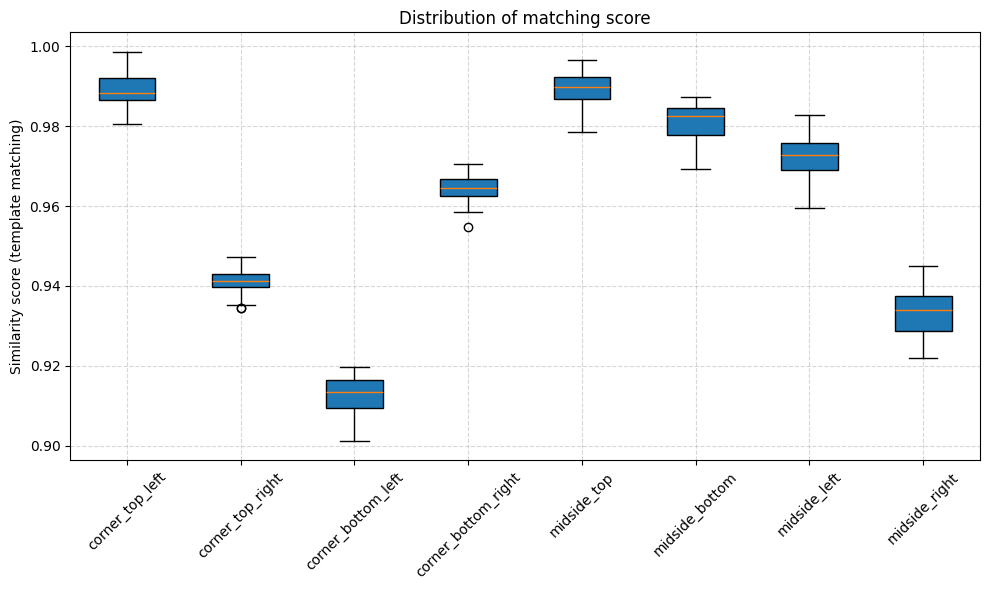

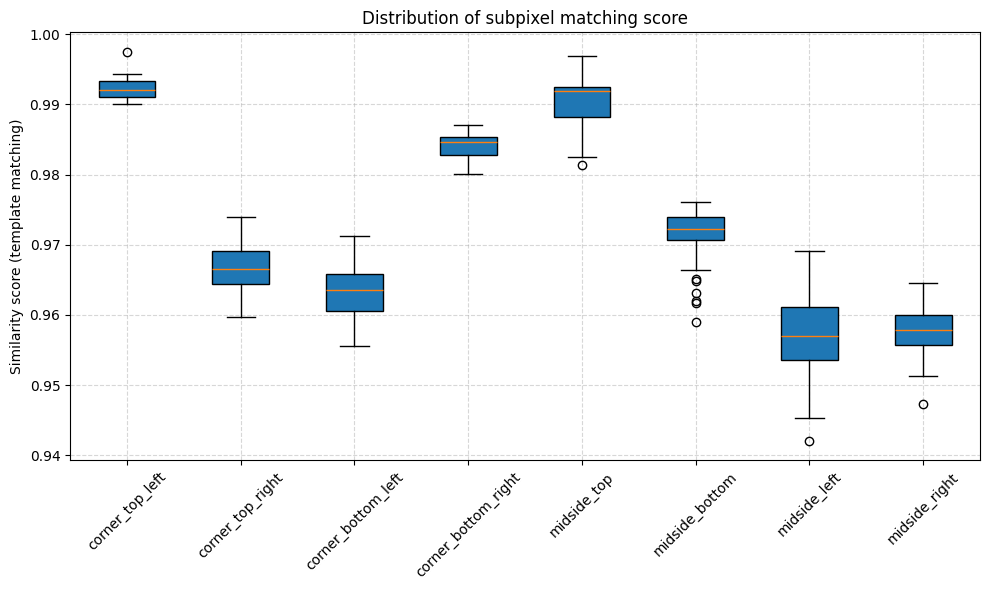

In [31]:
all_detections, all_scores, all_subpixel_scores = preproc.detect_fiducials(grid_size=7, max_workers=5)

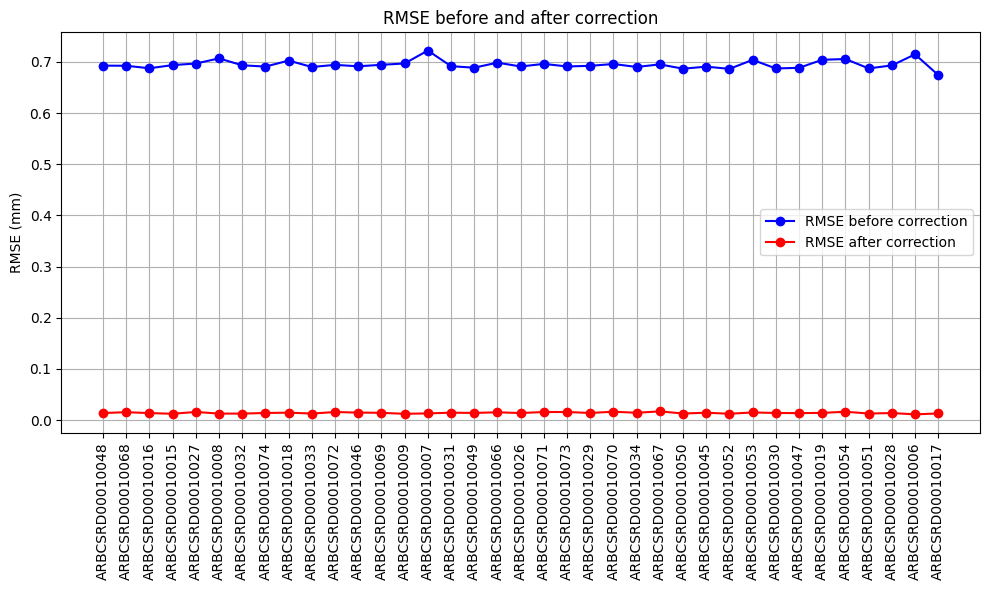

In [34]:
true_fiducials_mm = {
    "corner_top_left": (-105.998, 105.985), # 3
    "corner_top_right": (105.996, 106.006), # 2
    "corner_bottom_left": (-105.983, -106.005), # 1
    "corner_bottom_right": (106.001, -106.005), # 4
    "midside_top": (-0.003, 109.999), # 7
    "midside_bottom": (0.009, -109.992), # 8
    "midside_left": (-110.004, -0.009), # 5
    "midside_right": (110.013, 0.024) #6
}
res = preproc.images_restitution(
    all_detections,
    true_fiducials_mm,
    image_square_dim=8800
)
